<a href="https://colab.research.google.com/github/abhi271998/Emoji-Prediction-for-a-sentence-using-glove6B50D-file-and-RNN-LSTM-Models/blob/main/Emoji_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 10.0MB/s 


In [ ]:
import numpy as np
from scipy import spatial

In [ ]:
from google.colab import files
!pip install -q kaggle
uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d adityajn105/glove6b50d

 98% 66.0M/67.7M [00:08<00:00, 7.69MB/s]
100% 67.7M/67.7M [00:08<00:00, 7.89MB/s]


In [ ]:
!unzip '/content/glove6b50d.zip'

Archive:  /content/glove6b50d.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import emoji

In [ ]:
def label_to_emoji(label):
  return emoji.emojize(label, use_aliases=True)

In [ ]:
label_to_emoji(":smile:")

'😄'

In [ ]:
embedding_index = {}

f = open('/content/glove.6B.50d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coef = np.asarray(values[1:], dtype = 'float32')
  embedding_index[word] = coef

f.close()

In [ ]:
embedding_index["i"].shape

(50,)

In [ ]:
spatial.distance.cosine(embedding_index["happy"], embedding_index["sad"])

0.31093674898147583

In [ ]:
spatial.distance.cosine(embedding_index["india"], embedding_index["delhi"])

0.18572336435317993

In [ ]:
spatial.distance.cosine(embedding_index["france"], embedding_index["paris"])

0.19746702909469604

In [ ]:
spatial.distance.cosine(embedding_index["germany"], embedding_index["berlin"])

0.20145773887634277

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
import pandas as pd

In [ ]:
train = pd.read_csv('/content/train_emoji.csv', header=None)
test = pd.read_csv('/content/test_emoji.csv', header=None)

train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [ ]:
emoji_dict = { 0 : ":heart:", 1 : ":baseball:", 2 : ":smile:", 3 : ":disappointed:", 4 : ":fork_and_knife:"}

In [ ]:
X_train = train[0]
Y_train = train[1]

X_test = test[0]
Y_test = test[1]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(132,) (132,)
(56,) (56,)


In [ ]:
for ix in range(X_train.shape[0]):
  X_train[ix] = X_train[ix].split()

for ix in range(X_test.shape[0]):
  X_test[ix] = X_test[ix].split()

from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(X_train[0], Y_train[0])

['never', 'talk', 'to', 'me', 'again'] [0. 0. 0. 1. 0.]


In [ ]:
embedding_matrix_train = np.zeros((X_train.shape[0], 10, 50))
embedding_matrix_test = np.zeros((X_test.shape[0], 10, 50))

for ix in range(X_train.shape[0]):
  for iy in range(len(X_train[ix])):
    embedding_matrix_train[ix][iy] = embedding_index[X_train[ix][iy].lower()]

for ix in range(X_test.shape[0]):
  for iy in range(len(X_test[ix])):
    embedding_matrix_test[ix][iy] = embedding_index[X_test[ix][iy].lower()]


In [ ]:
print(embedding_matrix_train.shape)

(132, 10, 50)


In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(10, 50)))
# model.add(LSTM(64, return_sequences=True, input_shape=(10, 50)))

model.add(Dropout(0.5))
model.add(SimpleRNN(64, return_sequences=False))
# model.add(LSTM(64, return_sequences=False))

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10, 64)            7360      
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 15,941
Trainable params: 15,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(embedding_matrix_train, Y_train,validation_split=0.2, epochs=100, batch_size=64, shuffle=True)

Epoch 1/100
2/2 [==============================] - 2s 411ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 1.7075 - val_accuracy: 0.5556
Epoch 2/100
2/2 [==============================] - 0s 59ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 1.7092 - val_accuracy: 0.5185
Epoch 3/100
2/2 [==============================] - 0s 58ms/step - loss: 0.0475 - accuracy: 0.9937 - val_loss: 1.7041 - val_accuracy: 0.5926
Epoch 4/100
2/2 [==============================] - 0s 63ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 1.7219 - val_accuracy: 0.5926
Epoch 5/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0607 - accuracy: 0.9884 - val_loss: 1.7188 - val_accuracy: 0.5556
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 0.0344 - accuracy: 0.9937 - val_loss: 1.7689 - val_accuracy: 0.5556
Epoch 7/100
2/2 [==============================] - 0s 63ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 1.7632 - val_accuracy: 0.5926
Epoch 8/100
2/2 [==

In [ ]:
pred = model.predict_classes(embedding_matrix_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# RNN
acc = float(sum(pred == Y_test)) / embedding_matrix_test.shape[0]
print(acc) 

0.5178571428571429


In [ ]:
# LSTM

acc = float(sum(pred == Y_test)) / embedding_matrix_test.shape[0]
print(acc) 

0.6607142857142857


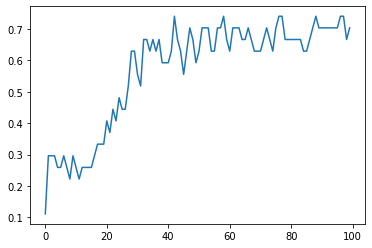

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])